In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sts
import scipy as ss
import plotly.graph_objects as go


In [2]:
Lsb = pd.read_csv('Loksabha_1962-2019 .csv')

Data Cleaning

In [16]:
Lsb.shape

(8000, 12)

In this Data set 8000 Rows and 12 Coloumns

In [15]:
Lsb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8000 entries, 0 to 8046
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Pc_name         8000 non-null   object 
 1   no              8000 non-null   object 
 2   type            8000 non-null   object 
 3   state           8000 non-null   object 
 4   candidate_name  8000 non-null   object 
 5   party           8000 non-null   object 
 6   electors        8000 non-null   object 
 7   votes           8000 non-null   object 
 8   Turnout         8000 non-null   object 
 9   margin          8000 non-null   object 
 10  margin%         8000 non-null   object 
 11  year            8000 non-null   float64
dtypes: float64(1), object(11)
memory usage: 812.5+ KB


In [14]:
Lsb.isnull().sum()

Pc_name           0
no                0
type              0
state             0
candidate_name    0
party             0
electors          0
votes             0
Turnout           0
margin            0
margin%           0
year              0
dtype: int64

First we are checking in this data set any missing values 

In [17]:
Lsb.dropna(inplace=True)

In [12]:
Lsb.duplicated().any()

False

So there are no duplicate values

In [18]:
Lsb.isnull().sum()

Pc_name           0
no                0
type              0
state             0
candidate_name    0
party             0
electors          0
votes             0
Turnout           0
margin            0
margin%           0
year              0
dtype: int64

In [19]:
Lsb.head(2)

,Pc_name,no,type,state,candidate_name,party,electors,votes,Turnout,margin,margin%,year
0,Adilabad,36,GEN,Andhra Pradesh,G. Narayan Reddy,Indian National Congress,404283,220383,54.5 %,"89,085",40.40%,1962.0
1,Adoni,27,GEN,Andhra Pradesh,Pendekanti Venkatasubbaiah,Indian National Congress,419077,252379,60.2 %,"33,022",13.10%,1962.0


In [8]:
Lsb['electors'] = Lsb['electors'].str.replace(',','')
Lsb['electors'] = Lsb['electors'].str.replace('-','0')

In [20]:
Lsb['votes'] = Lsb['votes'].str.replace(',','')
Lsb['votes'] = Lsb['votes'].str.replace('-','0')

In [21]:
Lsb['margin'] = Lsb['margin'].str.replace('-','0')
Lsb['margin'] = Lsb['margin'].str.replace(',','')

In [22]:
Lsb['electors'] = Lsb['electors'].astype(int)
Lsb['votes'] = Lsb['votes'].astype(int)

In [23]:
Lsb['no'] = Lsb['no'].astype(int)

Geeting Information About DataSet

In [24]:
Lsb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8000 entries, 0 to 8046
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Pc_name         8000 non-null   object 
 1   no              8000 non-null   int64  
 2   type            8000 non-null   object 
 3   state           8000 non-null   object 
 4   candidate_name  8000 non-null   object 
 5   party           8000 non-null   object 
 6   electors        8000 non-null   int64  
 7   votes           8000 non-null   int64  
 8   Turnout         8000 non-null   object 
 9   margin          8000 non-null   object 
 10  margin%         8000 non-null   object 
 11  year            8000 non-null   float64
dtypes: float64(1), int64(3), object(8)
memory usage: 812.5+ KB


Analysing the data 

In [25]:
Lsb['Pc_name'].value_counts()

Maharajganj       30
Aurangabad        30
Hamirpur          29
Khammam           15
Kolhapur          15
                  ..
Una                1
Vicarabad          1
Vijaywada          1
Warrangal          1
Yavatmal-Washi     1
Name: Pc_name, Length: 892, dtype: int64

In [26]:
Lsb['state'].value_counts()

Uttar Pradesh [1947 - 1999]                935
Maharashtra                                710
West Bengal                                620
Bihar [1947 - 1999]                        591
Andhra Pradesh                             544
Tamil Nadu                                 506
Madhya Pradesh [1947 - 1999]               430
Gujarat                                    382
Rajasthan                                  368
Karnataka                                  336
Uttar Pradesh [2000 Onwards]               320
Orissa                                     311
Kerala                                     296
Assam                                      206
Punjab                                     204
Bihar [2000 Onwards]                       160
Haryana                                    138
Madhya Pradesh [2000 Onwards]              116
Delhi [1977 Onwards]                        84
Mysore                                      80
Madras                                      79
Jammu & Kashm

In [27]:
Lsb.groupby(['state'])['party'].value_counts()

state                      party                           
Andaman & Nicobar Islands  Indian National Congress             10
                           Bharatiya Janta Party                 3
                           Indian National Congress (I)          1
Andhra Pradesh             Indian National Congress            318
                           Telugu Desam                        113
                                                              ... 
West Bengal                Praja Socialist Party                 2
                           Forward Block                         1
                           Gorkha National Liberation Front      1
                           Lok Sewak Sangh                       1
                           Samyukta Socialist Party              1
Name: party, Length: 455, dtype: int64

In [28]:
Lsb.groupby(['Pc_name'])['state'].value_counts()

Pc_name          state                    
A And N Islands  Andaman & Nicobar Islands     1
Adilabad         Andhra Pradesh               13
                 Telangana                     2
Adoni            Andhra Pradesh                1
Adoor            Kerala                       11
                                              ..
Yavatmal-Washi   Maharashtra                   1
Yavatmal-Washim  Maharashtra                   2
Yeotmal          Maharashtra                   4
Zahirabad        Telangana                     2
                 Andhra Pradesh                1
Name: state, Length: 1202, dtype: int64

So most of the values in near about 60 to 70 

In [31]:
Lsb.head()

,Pc_name,no,type,state,candidate_name,party,electors,votes,Turnout,margin,margin%,year
0,Adilabad,36,GEN,Andhra Pradesh,G. Narayan Reddy,Indian National Congress,404283,220383,54.5 %,89085,40.40%,1962.0
1,Adoni,27,GEN,Andhra Pradesh,Pendekanti Venkatasubbaiah,Indian National Congress,419077,252379,60.2 %,33022,13.10%,1962.0
2,Agra,433,GEN,Uttar Pradesh [1947 - 1999],Seth Achal Singh,Indian National Congress,433164,275663,63.6 %,54351,19.70%,1962.0
3,Ahmedabad,120,GEN,Gujarat,Indulal Kanaiyalal Yagnik,Nutan Maha Gujarat Janta Parisha,433392,270346,62.4 %,21592,8.00%,1962.0
4,Ahmednagar,245,GEN,Maharashtra,Motilal Kundanmal Firodya,Indian National Congress,403913,222091,55.0 %,14038,6.30%,1962.0


In [32]:
pd.crosstab(Lsb.state,Lsb.type)

type,GEN,GENP,SC,ST
state,,,,
Andaman & Nicobar Islands,14,0,0,0
Andhra Pradesh,437,0,79,28
Andhra Pradesh [2014 Onwards],20,0,4,1
Arunachal Pradesh,21,2,0,0
Assam,163,0,14,29
Bihar [1947 - 1999],450,0,87,54
Bihar [2000 Onwards],136,0,24,0
Chandigarh,14,0,0,0
Chhattisgarh,24,0,4,16


You can see clearly in Loksabha seat hwo many Citizens are Genral,SC,ST, and GNEP by State wise.

In [33]:
pd.crosstab(Lsb.state,Lsb.type).sum()

type
GEN     6112
GENP       2
SC      1241
ST       645
dtype: int64

In Loksabha Genral Category Citizens are maximum.Compare to other Cast of People.

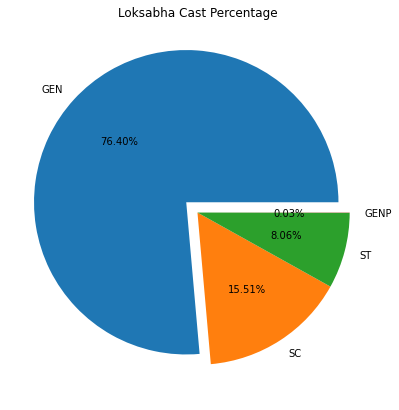

In [34]:
plt.figure(figsize=(8,7))
plt.pie(Lsb['type'].value_counts(),
labels=Lsb['type'].value_counts().index,
autopct='%1.2f%%',
explode=[0.1,0,0,0])
plt.title('Loksabha Cast Percentage')
plt.show()

In [35]:
Lsb.groupby(['state','Pc_name'])['candidate_name'].value_counts()

state                      Pc_name                      candidate_name       
Andaman & Nicobar Islands  A And N Islands              K .R. Ganesh             1
                           Andaman & Nicobar Islands    Manoranjan Bhakta        8
                                                        Bishnu Pada Ray          1
                                                        Shri. Bishnu Pada Ray    1
                           Andaman And Nicobar Islands  Bishnu Pada Ray          1
                                                                                ..
West Bengal                Vishnupur                    Sandhya Bauri            3
                                                        Sukhendu Khan            2
                                                        P. Mondal                1
                                                        Pashupati Mandal         1
                                                        Susmita Bauri            1
Name: can

In [37]:
Lsb.groupby('year')['votes'].mean().sort_values(ascending=False)

year
2019.0    1.133350e+06
2014.0    1.019893e+06
2009.0    7.681164e+05
2004.0    7.170209e+05
1998.0    6.914213e+05
1999.0    6.844735e+05
1996.0    6.322433e+05
1989.0    5.702039e+05
1991.0    5.264392e+05
1984.0    4.728689e+05
1980.0    3.740828e+05
1977.0    3.590830e+05
1967.0    2.964993e+05
1971.0    2.931079e+05
1962.0    2.441883e+05
Name: votes, dtype: float64

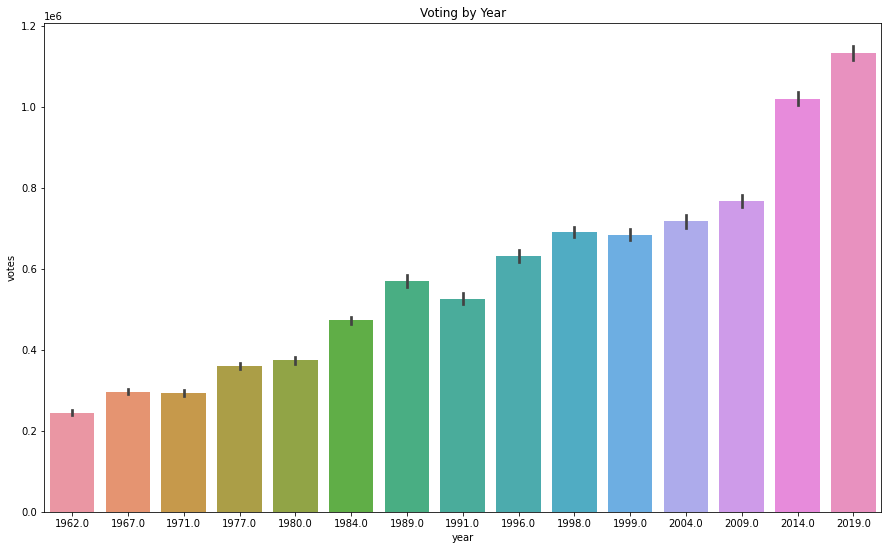

In [143]:
plt.figure(figsize=(15,9))
sns.barplot(data=Lsb,x='year',y='votes')
plt.title('Voting by Year')
plt.show()

In [144]:
Lsb.groupby('state')['votes'].mean().sort_values(ascending=False)

state
Andhra Pradesh [2014 Onwards]              1.157062e+06
Telangana                                  1.119850e+06
Chhattisgarh                               9.446948e+05
Madhya Pradesh [2000 Onwards]              9.008018e+05
Uttar Pradesh [2000 Onwards]               8.625107e+05
Jharkhand                                  8.293731e+05
Bihar [2000 Onwards]                       8.141356e+05
Uttarakhand                                7.526233e+05
Karnataka                                  7.455966e+05
West Bengal                                7.454044e+05
Tamil Nadu                                 6.977122e+05
Haryana                                    6.934323e+05
Nagaland                                   6.485380e+05
Kerala                                     6.457784e+05
Delhi [1977 Onwards]                       6.079328e+05
Andhra Pradesh                             6.056608e+05
Punjab                                     6.016660e+05
Rajasthan                                 

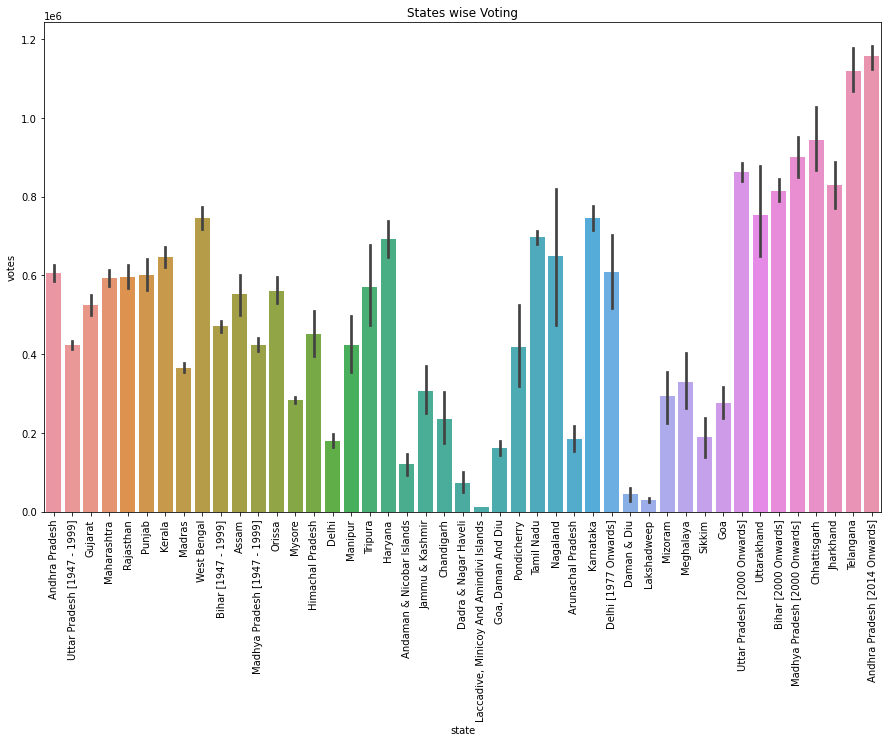

In [146]:
plt.figure(figsize=(15,9))
sns.barplot(data=Lsb,x='state',y='votes')
plt.xticks(rotation = '90')
plt.title('States wise Voting')
plt.show()

After analysing the data i found Andhra Pradesh is Highest voting and lowest is Laccadive,Minicoy and Amindivi Islands 1968 to 2019.

In [76]:
Lsb.groupby('state')['seats'].value_counts()

state                      seats
Andaman & Nicobar Islands  1        12
                           497       1
                           501       1
Andhra Pradesh             1        13
                           2        13
                                    ..
West Bengal                492       1
                           493       1
                           494       1
                           495       1
                           496       1
Name: seats, Length: 1520, dtype: int64

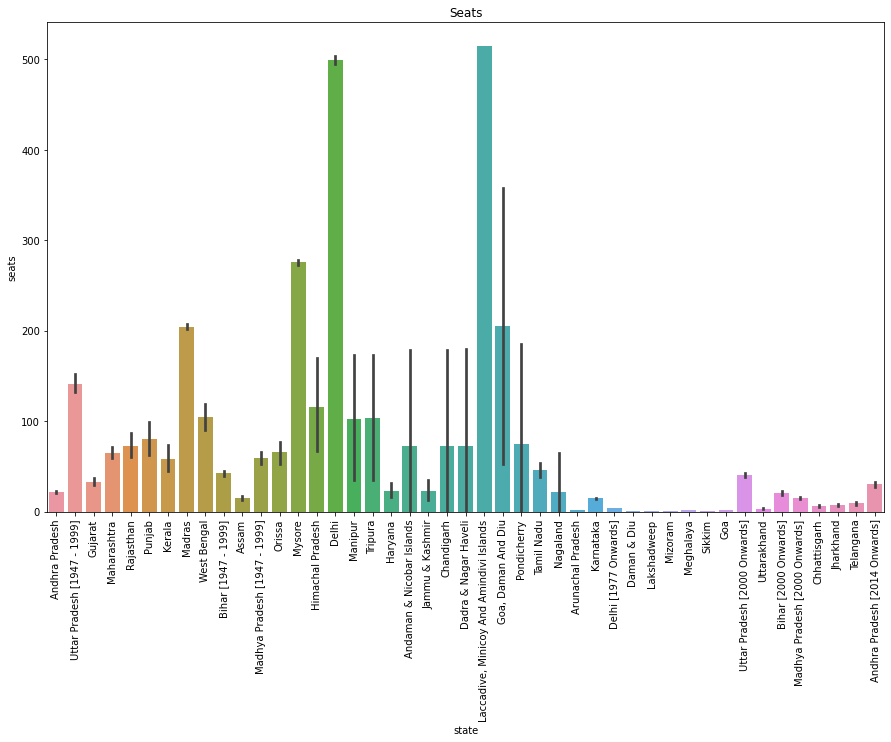

In [78]:
plt.figure(figsize=(15,9))
sns.barplot(data=Lsb,x='state',y='seats')
plt.xticks(rotation = '90')
plt.title('Seats')
plt.show()


In [51]:
Lsb.columns

Index(['Pc_name', 'no', 'type', 'state', 'candidate_name', 'party', 'electors',
       'votes', 'Turnout', 'margin', 'margin%', 'year'],
      dtype='object')

<Figure size 1080x648 with 0 Axes>

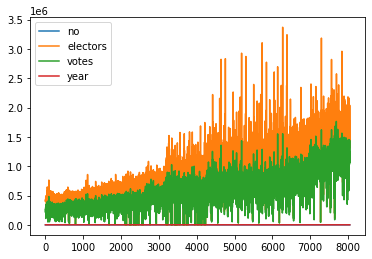

In [60]:
plt.figure(figsize=(15,9))
Lsb.plot.line();


In [66]:
Lsb.columns

Index(['Pc_name', 'no', 'type', 'state', 'candidate_name', 'party', 'electors',
       'votes', 'Turnout', 'margin', 'margin%', 'year'],
      dtype='object')

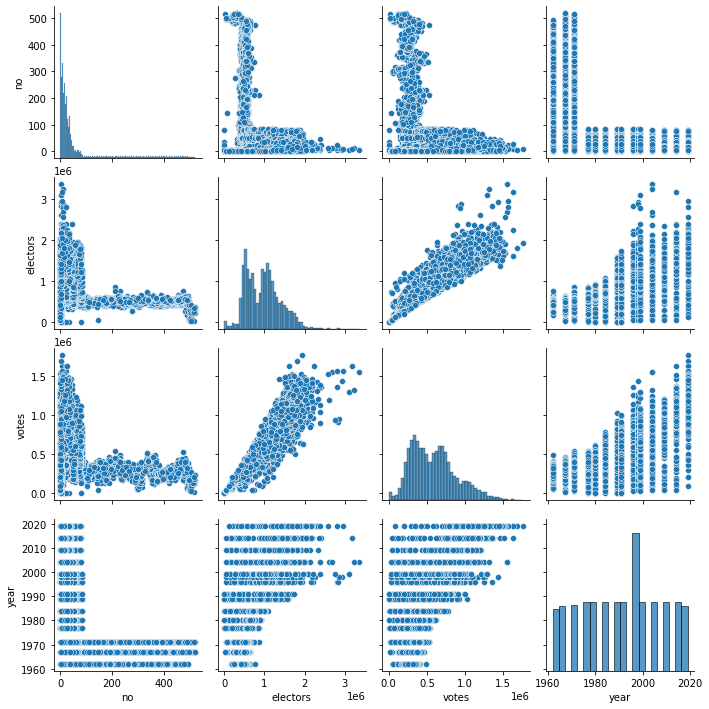

In [68]:
sns.pairplot(Lsb)

Loksabha in India Highest Voting State is Andhra Pradesh[2014].General category citizens are highest voting People in compare to another cast.

In [84]:
Lsb.rename(columns={'no':'seats'},inplace=True)

Lets analyse Uttar Pradesh constituency

In [108]:
Uttar_Pradesh = pd.DataFrame(Lsb[Lsb['state'] =='Uttar Pradesh [2000 Onwards]'])

In [110]:
Uttar_Pradesh.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 320 entries, 5879 to 8034
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Pc_name         320 non-null    object 
 1   seats           320 non-null    int64  
 2   type            320 non-null    object 
 3   state           320 non-null    object 
 4   candidate_name  320 non-null    object 
 5   party           320 non-null    object 
 6   electors        320 non-null    int64  
 7   votes           320 non-null    int64  
 8   Turnout         320 non-null    object 
 9   margin          320 non-null    object 
 10  margin%         320 non-null    object 
 11  year            320 non-null    float64
dtypes: float64(1), int64(3), object(8)
memory usage: 32.5+ KB


In [111]:
Uttar_Pradesh.shape

(320, 12)

In [112]:
Uttar_Pradesh.head(2)

,Pc_name,seats,type,state,candidate_name,party,electors,votes,Turnout,margin,margin%,year
5879,Agra,69,GEN,Uttar Pradesh [2000 Onwards],Raj Babbar,Samajwadi Party,1430713,642675,44.9 %,57342,8.90%,2004.0
5883,Akbarpur,23,GEN,Uttar Pradesh [2000 Onwards],Maya Wati,Bahujan Samaj Party,1446088,741543,51.3 %,58269,7.90%,2004.0


In [114]:
Uttar_Pradesh['Turnout'] = Uttar_Pradesh['Turnout'].str.replace('%',"")
Uttar_Pradesh['Turnout'] = Uttar_Pradesh['Turnout'].str.replace('-',"")
Uttar_Pradesh['Turnout'] = pd.to_numeric(Uttar_Pradesh['Turnout'],errors='coerce')

In [113]:
Uttar_Pradesh['margin']=Uttar_Pradesh['margin'].str.replace(',', '').astype(float)

In [117]:
Uttar_Pradesh['margin%'] = Uttar_Pradesh['margin%'].str.replace('%',"")
Uttar_Pradesh['margin%'] = Uttar_Pradesh['margin%'].str.replace('-',"")
Uttar_Pradesh['margin%'] = Uttar_Pradesh['margin%'].astype(float)

In [118]:
Uttar_Pradesh.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 320 entries, 5879 to 8034
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Pc_name         320 non-null    object 
 1   seats           320 non-null    int64  
 2   type            320 non-null    object 
 3   state           320 non-null    object 
 4   candidate_name  320 non-null    object 
 5   party           320 non-null    object 
 6   electors        320 non-null    int64  
 7   votes           320 non-null    int64  
 8   Turnout         320 non-null    float64
 9   margin          320 non-null    float64
 10  margin%         320 non-null    float64
 11  year            320 non-null    float64
dtypes: float64(4), int64(3), object(5)
memory usage: 32.5+ KB


In [121]:
u_p1 = Uttar_Pradesh.groupby(['Pc_name','year'])
u_p1.first()

seats type                         state  \
Pc_name  year                                               
Agra     2004.0     69  GEN  Uttar Pradesh [2000 Onwards]   
         2009.0     18   SC  Uttar Pradesh [2000 Onwards]   
         2014.0     18   SC  Uttar Pradesh [2000 Onwards]   
         2019.0     18   SC  Uttar Pradesh [2000 Onwards]   
Akbarpur 2004.0     23  GEN  Uttar Pradesh [2000 Onwards]   
...                ...  ...                           ...   
Unnao    2019.0     33  GEN  Uttar Pradesh [2000 Onwards]   
Varanasi 2004.0     48  GEN  Uttar Pradesh [2000 Onwards]   
         2009.0     77  GEN  Uttar Pradesh [2000 Onwards]   
         2014.0     77  GEN  Uttar Pradesh [2000 Onwards]   
         2019.0     77  GEN  Uttar Pradesh [2000 Onwards]   

                           candidate_name                     party  electors  \
Pc_name  year                                                                   
Agra     2004.0                Raj Babbar           Samajwadi Party   1430713   
         2009.0            Dr. Ramshankar     Bharatiya Janta Party   1539683   
         2014.0  Dr. Ram Shankar Katheria     Bharatiya Janta Party   1814739   
         2019.0     Satyapal Singh Baghel     Bharatiya Janta Party   1866262   
Akbarpur 2004.0                 Maya Wati       Bahujan Samaj Party   1446088   
...                                   ...                       ...       ...   
Unnao    2019.0   Swami Sakshi Ji Maharaj     Bharatiya Janta Party   2160607   
Varanasi 2004.0   Dr. Rajesh Kumar Mishra  Indian National Congress   1487696   
         2009.0   Dr. Murli Manohar Joshi     Bharatiya Janta Party   1561854   
         2014.0             Narendra Modi     Bharatiya Janta Party   1767486   
         2019.0             Narendra Modi     Bharatiya Janta Party   1784093   

                   votes  Turnout    margin  margin%  
Pc_name  year                                         
Agra     2004.0   642675     44.9   57342.0      8.9  
         2009.0   648793     42.1    9715.0      1.5  
         2014.0  1070400     59.0  300263.0     28.1  
         2019.0  1145323     61.7  211546.0     18.5  
Akbarpur 2004.0   741543     51.3   58269.0      7.9  
...                  ...      ...       ...      ...  
Unnao    2019.0  1237076     57.8  400956.0     32.4  
Varanasi 2004.0   633729     42.6   57436.0      9.1  
         2009.0   665719     42.6   17211.0      2.6  
         2014.0  1030685     58.3  371784.0     36.1  
         2019.0  1060476     59.7  479505.0     45.2  

[320 rows x 10 columns]

In [122]:
u_p1.count()

seats  type  state  candidate_name  party  electors  votes  \
Pc_name  year                                                                 
Agra     2004.0      1     1      1               1      1         1      1   
         2009.0      1     1      1               1      1         1      1   
         2014.0      1     1      1               1      1         1      1   
         2019.0      1     1      1               1      1         1      1   
Akbarpur 2004.0      1     1      1               1      1         1      1   
...                ...   ...    ...             ...    ...       ...    ...   
Unnao    2019.0      1     1      1               1      1         1      1   
Varanasi 2004.0      1     1      1               1      1         1      1   
         2009.0      1     1      1               1      1         1      1   
         2014.0      1     1      1               1      1         1      1   
         2019.0      1     1      1               1      1         1      1   

                 Turnout  margin  margin%  
Pc_name  year                              
Agra     2004.0        1       1        1  
         2009.0        1       1        1  
         2014.0        1       1        1  
         2019.0        1       1        1  
Akbarpur 2004.0        1       1        1  
...                  ...     ...      ...  
Unnao    2019.0        1       1        1  
Varanasi 2004.0        1       1        1  
         2009.0        1       1        1  
         2014.0        1       1        1  
         2019.0        1       1        1  

[320 rows x 10 columns]

In [123]:
u_p1.size()

Pc_name   year  
Agra      2004.0    1
          2009.0    1
          2014.0    1
          2019.0    1
Akbarpur  2004.0    1
                   ..
Unnao     2019.0    1
Varanasi  2004.0    1
          2009.0    1
          2014.0    1
          2019.0    1
Length: 320, dtype: int64

In [137]:
seatyr=Uttar_Pradesh.groupby(['party','year']).count()


In [132]:
seatyr.index

MultiIndex([(                          'Apna Dal', 2014.0),
            (               'Apna Dal (Soneylal)', 2019.0),
            (               'Bahujan Samaj Party', 2004.0),
            (               'Bahujan Samaj Party', 2009.0),
            (               'Bahujan Samaj Party', 2019.0),
            (             'Bharatiya Janta Party', 2004.0),
            (             'Bharatiya Janta Party', 2009.0),
            (             'Bharatiya Janta Party', 2014.0),
            (             'Bharatiya Janta Party', 2019.0),
            (                       'Independent', 2004.0),
            (                       'Independent', 2009.0),
            (          'Indian National Congress', 2004.0),
            (          'Indian National Congress', 2009.0),
            (          'Indian National Congress', 2014.0),
            (          'Indian National Congress', 2019.0),
            (               'Janata Dal (United)', 2004.0),
            (         'National Loktantr

In [133]:
seatyr['votes']

party                               year  
Apna Dal                            2014.0     2
Apna Dal (Soneylal)                 2019.0     2
Bahujan Samaj Party                 2004.0    19
                                    2009.0    20
                                    2019.0    10
Bharatiya Janta Party               2004.0    10
                                    2009.0    10
                                    2014.0    71
                                    2019.0    62
Independent                         2004.0     1
                                    2009.0     1
Indian National Congress            2004.0     9
                                    2009.0    21
                                    2014.0     2
                                    2019.0     1
Janata Dal (United)                 2004.0     1
National Loktantrik Party           2004.0     1
Rashtriya Lok Dal                   2004.0     3
                                    2009.0     5
Samajwadi Janata Party (RA

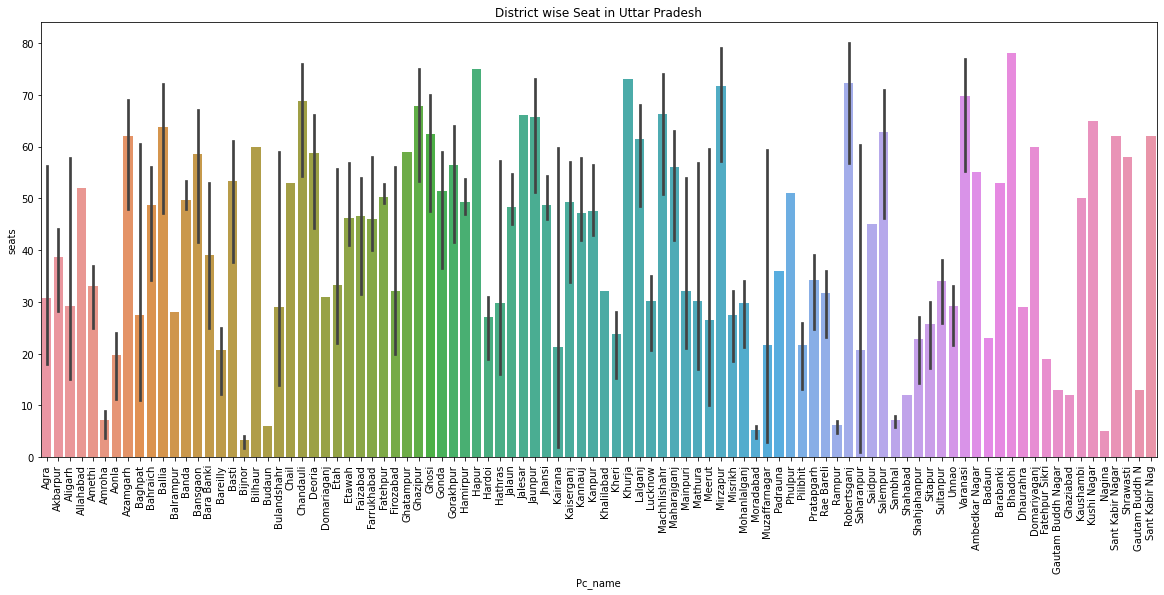

In [149]:
plt.figure(figsize=(20,8))
sns.barplot(x='Pc_name',y='seats',data=Uttar_Pradesh)
plt.xticks(rotation = '90')
plt.title('District wise Seat in Uttar Pradesh')
plt.show()

In [152]:
Uttar_Pradesh.groupby('year')['votes'].value_counts()

year    votes  
2004.0  492076     1
        504722     1
        506655     1
        522063     1
        526286     1
                  ..
2019.0  1269040    1
        1282206    1
        1380890    1
        1392952    1
        1524456    1
Name: votes, Length: 320, dtype: int64

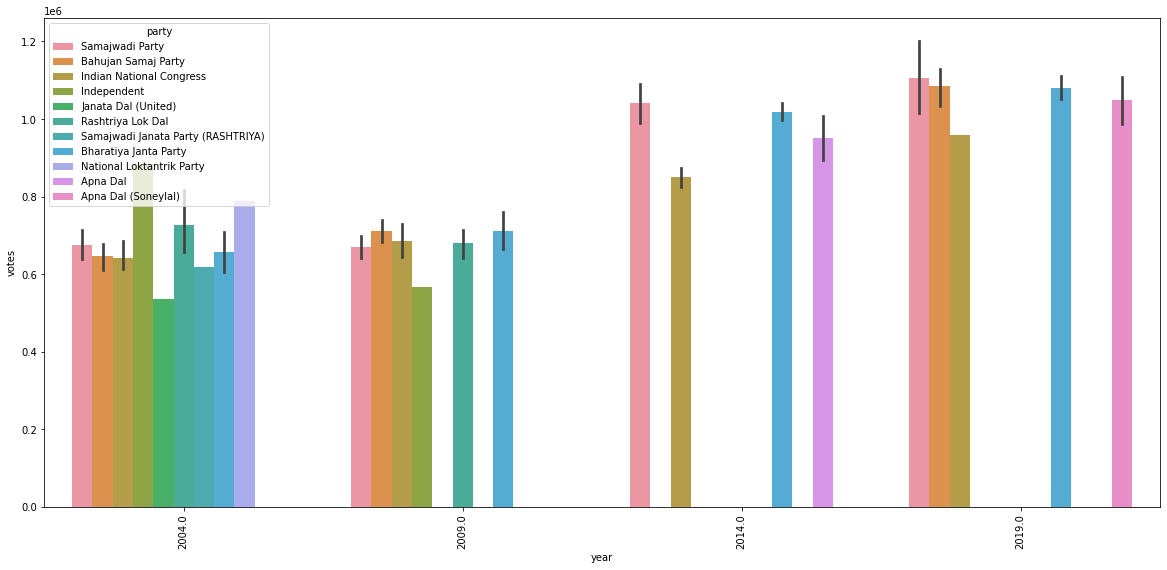

In [161]:
plt.figure(figsize=(20,9))
sns.barplot(x='year',y='votes',data=Uttar_Pradesh,hue='party')
plt.xticks(rotation = '90')
plt.show()

In [162]:
Uttar_Pradesh.columns

Index(['Pc_name', 'seats', 'type', 'state', 'candidate_name', 'party',
       'electors', 'votes', 'Turnout', 'margin', 'margin%', 'year'],
      dtype='object')

In [163]:
Uttar_Pradesh.groupby('year')['electors'].mean()

year
2004.0    1.382806e+06
2009.0    1.450080e+06
2014.0    1.737073e+06
2019.0    1.786322e+06
Name: electors, dtype: float64

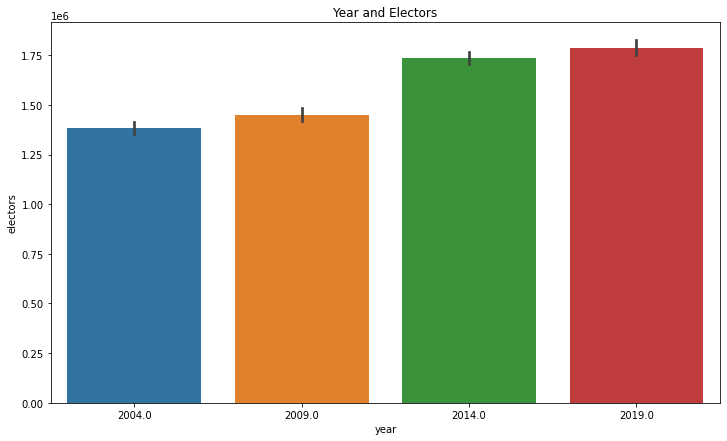

In [168]:
plt.figure(figsize=(12,7))
sns.barplot(x= 'year',y='electors',data=Uttar_Pradesh)
plt.title('Year and Electors')
plt.show()


In [173]:
Uttar_Pradesh.corr()

,seats,electors,votes,Turnout,margin,margin%,year
seats,1.000000e+00,0.135421,-0.098273,-0.272312,-0.053451,-0.024069,-6.605124e-17
electors,1.354207e-01,1.000000,0.822580,0.384042,0.475146,0.273779,7.282061e-01
votes,-9.827321e-02,0.822580,1.000000,0.837339,0.521545,0.301394,8.330663e-01
Turnout,-2.723117e-01,0.384042,0.837339,1.000000,0.389815,0.232323,6.638865e-01
margin,-5.345124e-02,0.475146,0.521545,0.389815,1.000000,0.944908,3.950482e-01
margin%,-2.406929e-02,0.273779,0.301394,0.232323,0.944908,1.000000,2.240600e-01
year,-6.605124e-17,0.728206,0.833066,0.663887,0.395048,0.224060,1.000000e+00


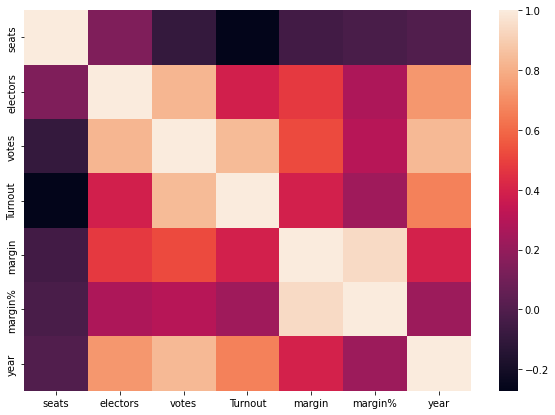

In [176]:
plt.figure(figsize=(10,7))
sns.heatmap(Uttar_Pradesh.corr())
plt.show()

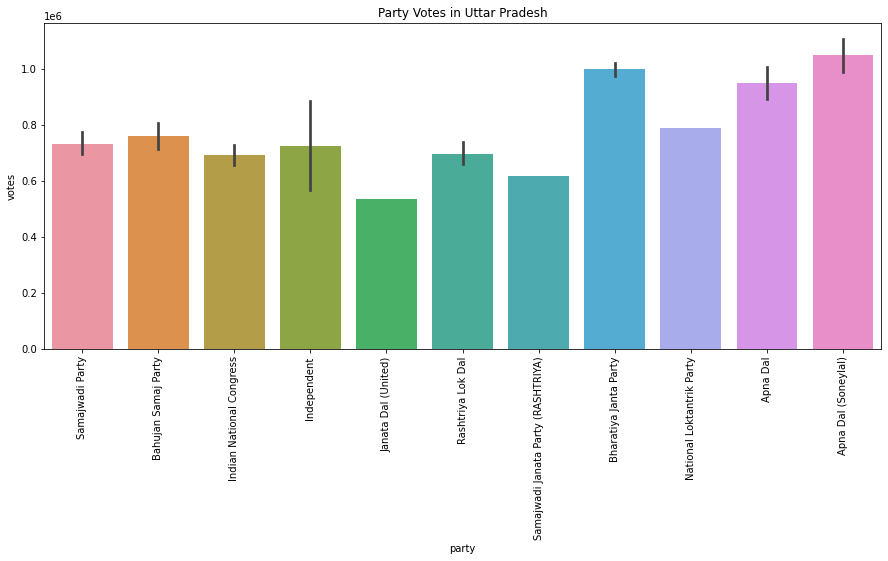

In [184]:
plt.figure(figsize=(15,6))
sns.barplot(x='party',y='votes', data=Uttar_Pradesh)
plt.xticks(rotation = '90')
plt.title('Party Votes in Uttar Pradesh')
plt.show()

In [193]:
U_4 = Uttar_Pradesh[Uttar_Pradesh['year'] == 2004]
X = U_4.party
Y = U_4.seats

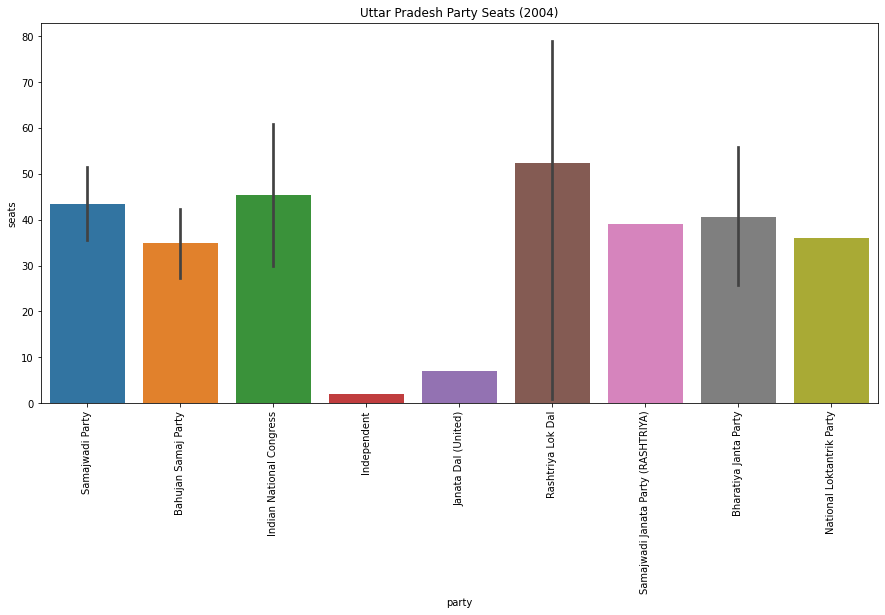

In [197]:
plt.figure(figsize=(15,7))
sns.barplot(x=X,y=Y)
plt.xticks(rotation = '90')
plt.title('Uttar Pradesh Party Seats (2004)')
plt.show()

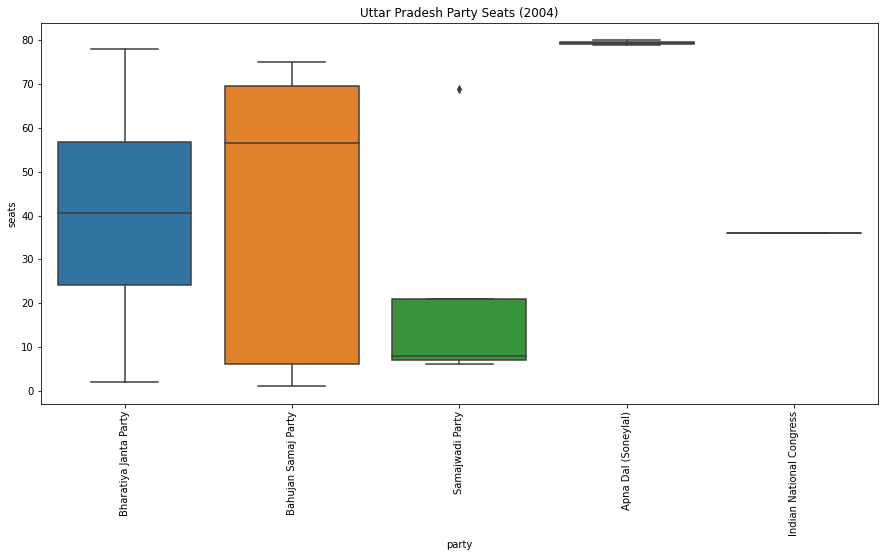

In [201]:
plt.figure(figsize=(15,7))
sns.boxplot(x=X,y=Y)
plt.xticks(rotation = '90')
plt.title('Uttar Pradesh Party Seats (2004)')
plt.show()

In [199]:
U_19 = Uttar_Pradesh[Uttar_Pradesh['year'] == 2019]
X = U_19.party
Y = U_19.seats

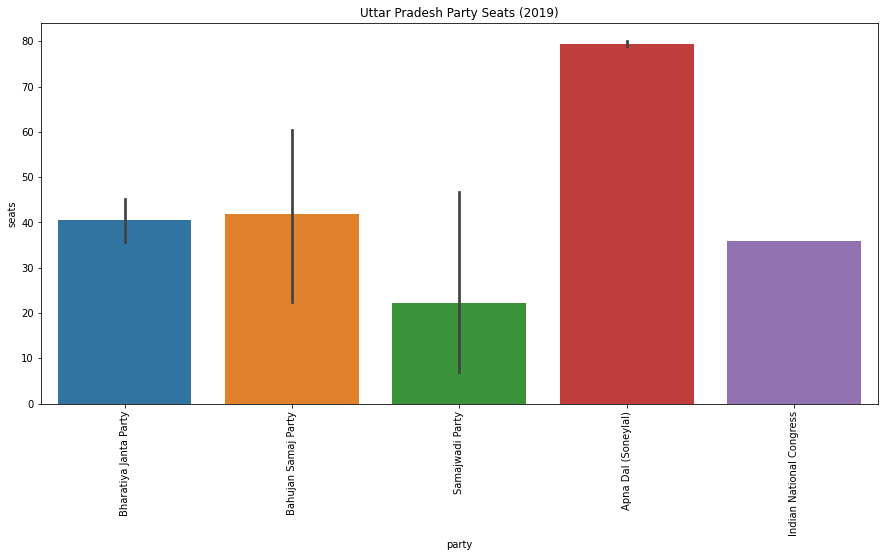

In [200]:
plt.figure(figsize=(15,7))
sns.barplot(x=X,y=Y)
plt.xticks(rotation = '90')
plt.title('Uttar Pradesh Party Seats (2019)')
plt.show()